In [1]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)

from sklearn import metrics

cvd_data = pd.read_csv('/Users/twinklerinamdar/Documents/NEU/Quarter 4/Predictive Analytics/Group Project/cardio.csv')
cvd_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [2]:
for col in cvd_data.columns:
    print("\n" + col)
    print(cvd_data[col].value_counts())   


id
2047     1
97146    1
78707    1
68468    1
66421    1
        ..
48701    1
46652    1
34362    1
38456    1
0        1
Name: id, Length: 70000, dtype: int64

age
19741    32
18236    32
20376    31
20442    31
18253    31
         ..
17768     1
21497     1
15591     1
23672     1
14329     1
Name: age, Length: 8076, dtype: int64

gender
1    45530
2    24470
Name: gender, dtype: int64

height
165    5853
160    5022
170    4679
168    4399
164    3396
       ... 
81        1
80        1
207       1
76        1
64        1
Name: height, Length: 109, dtype: int64

weight
65.0     3850
70.0     3764
68.0     2831
75.0     2740
60.0     2710
         ... 
169.0       1
54.9        1
96.5        1
42.2        1
50.7        1
Name: weight, Length: 287, dtype: int64

ap_hi
120     27699
140      9506
130      8961
110      8644
150      4450
        ...  
97          1
230         1
806         1
2000        1
93          1
Name: ap_hi, Length: 153, dtype: int64

ap_lo
80      34847
90

In [3]:
cvd_data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### Data Cleaning

In [4]:
cvd_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


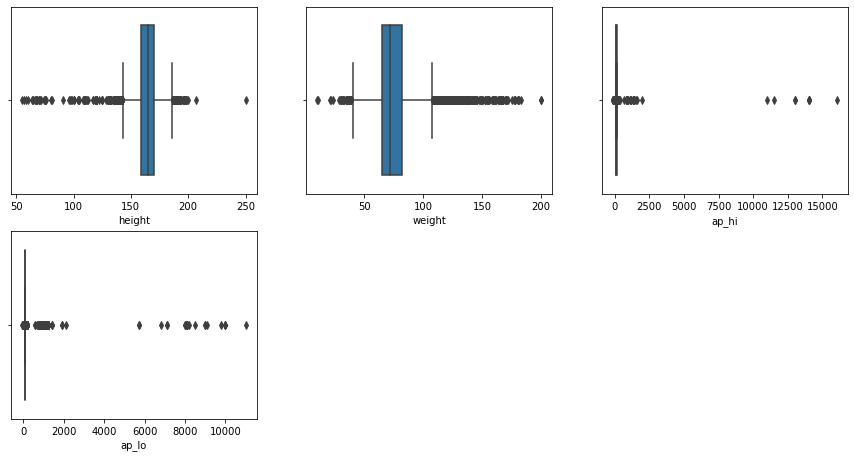

In [5]:
plt.figure(figsize=(15,20))
plt.subplot(5,3,1)
sns.boxplot(cvd_data['height'])
plt.subplot(5,3,2)
sns.boxplot(cvd_data['weight'])
plt.subplot(5,3,3)
sns.boxplot(cvd_data['ap_hi'])
plt.subplot(5,3,4)
sns.boxplot(cvd_data['ap_lo'])

(69310, 13)


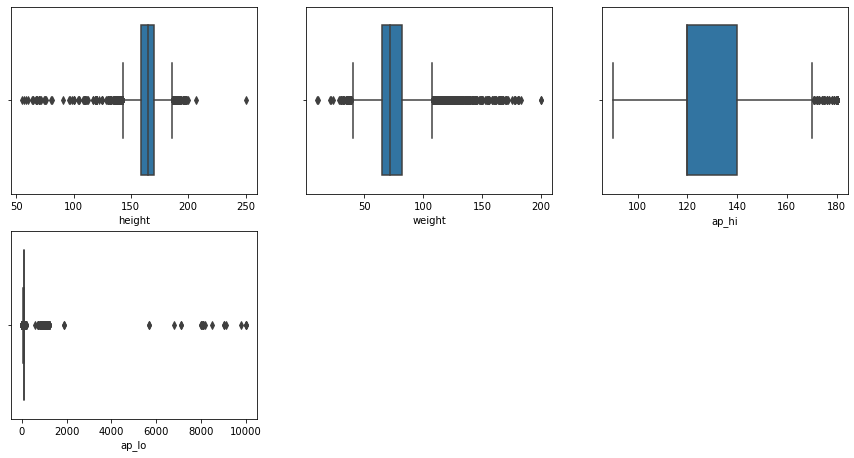

In [6]:
#Treating Outlier of ap_hi
q1 = cvd_data['ap_hi'].quantile(0.01)
q4 = cvd_data['ap_hi'].quantile(0.99)
cvd_data = cvd_data[(cvd_data['ap_hi']>=q1) & (cvd_data['ap_hi']<=q4)]
print(cvd_data.shape)

plt.figure(figsize=(15,20))
plt.subplot(5,3,1)
sns.boxplot(cvd_data['height'])
plt.subplot(5,3,2)
sns.boxplot(cvd_data['weight'])
plt.subplot(5,3,3)
sns.boxplot(cvd_data['ap_hi'])
plt.subplot(5,3,4)
sns.boxplot(cvd_data['ap_lo'])

(67666, 13)


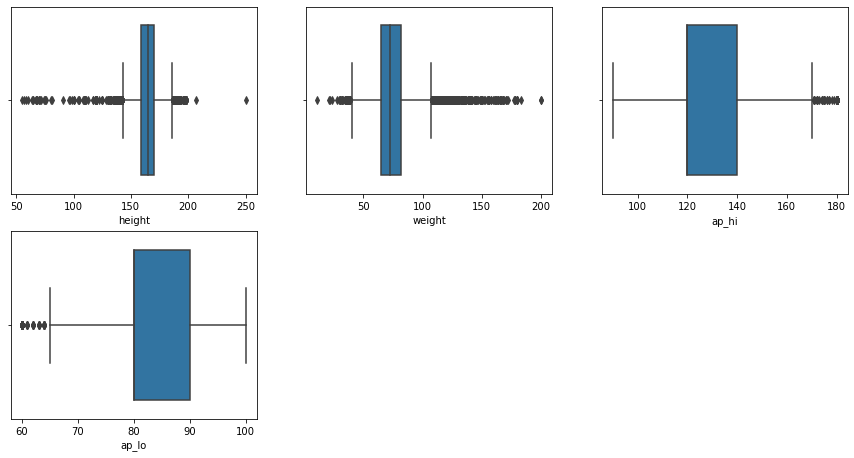

In [7]:
#Treating Outlier of ap_lo
q1 = cvd_data['ap_lo'].quantile(0.04)
q4 = cvd_data['ap_lo'].quantile(0.96)
cvd_data = cvd_data[(cvd_data['ap_lo']>=q1) & (cvd_data['ap_lo']<=q4)]
print(cvd_data.shape)

plt.figure(figsize=(15,20))
plt.subplot(5,3,1)
sns.boxplot(cvd_data['height'])
plt.subplot(5,3,2)
sns.boxplot(cvd_data['weight'])
plt.subplot(5,3,3)
sns.boxplot(cvd_data['ap_hi'])
plt.subplot(5,3,4)
sns.boxplot(cvd_data['ap_lo'])

(66448, 13)


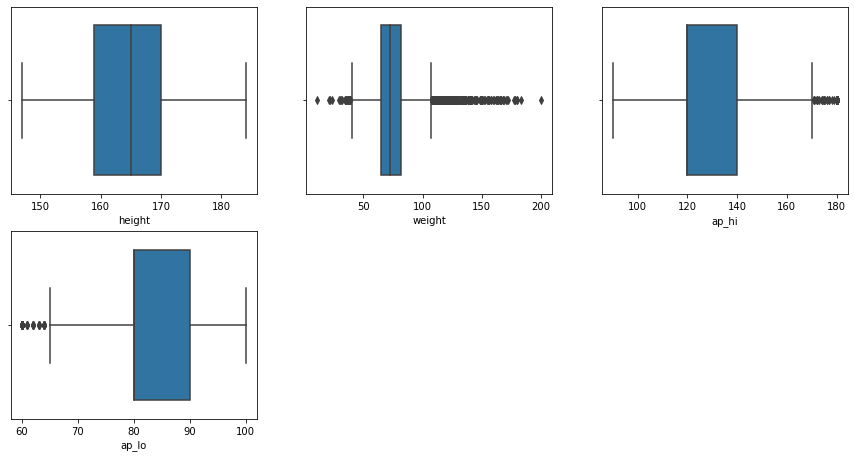

In [8]:
#Treating Outlier of height
q1 = cvd_data['height'].quantile(0.01)
q4 = cvd_data['height'].quantile(0.99)
cvd_data = cvd_data[(cvd_data['height']>=q1) & (cvd_data['height']<=q4)]
print(cvd_data.shape)

plt.figure(figsize=(15,20))
plt.subplot(5,3,1)
sns.boxplot(cvd_data['height'])
plt.subplot(5,3,2)
sns.boxplot(cvd_data['weight'])
plt.subplot(5,3,3)
sns.boxplot(cvd_data['ap_hi'])
plt.subplot(5,3,4)
sns.boxplot(cvd_data['ap_lo'])

(65252, 13)


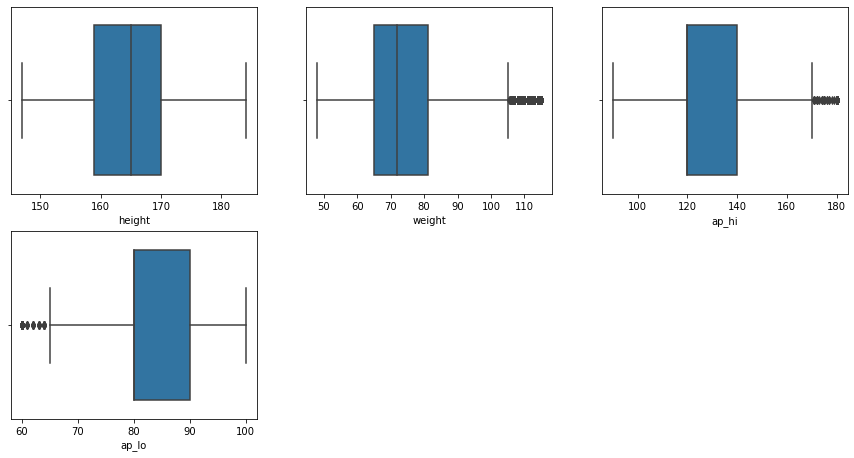

In [9]:
#Treating Outlier of weight
q1 = cvd_data['weight'].quantile(0.01)
q4 = cvd_data['weight'].quantile(0.99)
cvd_data = cvd_data[(cvd_data['weight']>=q1) & (cvd_data['weight']<=q4)]
print(cvd_data.shape)

plt.figure(figsize=(15,20))
plt.subplot(5,3,1)
sns.boxplot(cvd_data['height'])
plt.subplot(5,3,2)
sns.boxplot(cvd_data['weight'])
plt.subplot(5,3,3)
sns.boxplot(cvd_data['ap_hi'])
plt.subplot(5,3,4)
sns.boxplot(cvd_data['ap_lo'])

In [10]:
print("Diastolic pressure is higher than systolic one in {0} cases".format(cvd_data[cvd_data['ap_lo']> cvd_data['ap_hi']].shape[0]))



Diastolic pressure is higher than systolic one in 2 cases


In [11]:
cvd_data.drop(cvd_data[(cvd_data['ap_hi'] > cvd_data['ap_hi'].quantile(0.975)) | (cvd_data['ap_hi'] < cvd_data['ap_hi'].quantile(0.025))].index,inplace=True)
cvd_data.drop(cvd_data[(cvd_data['ap_lo'] > cvd_data['ap_lo'].quantile(0.975)) | (cvd_data['ap_lo'] < cvd_data['ap_lo'].quantile(0.025))].index,inplace=True)

In [12]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(cvd_data[cvd_data['ap_lo']> cvd_data['ap_hi']].shape[0]))



Diastilic pressure is higher than systolic one in 0 cases


In [13]:
cvd_data.shape

(63321, 13)

In [14]:
cvd_data['age'] = cvd_data['age']/365
cvd_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,53.969863,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,57.736986,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69998,99998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


In [15]:
cvd_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,63321.000000,63321.000000,63321.000000,63321.000000,63321.000000,63321.000000,63321.000000,63321.000000,63321.000000,63321.000000,63321.000000,63321.000000,63321.000000
mean,49941.407464,53.340947,1.348952,164.514253,73.667257,125.807520,81.063391,1.355143,1.221601,0.086827,0.052273,0.804078,0.488400
std,28852.365929,6.745205,0.476643,7.279743,12.673515,13.845182,8.291826,0.673189,0.568722,0.281584,0.222579,0.396912,0.499869
min,0.000000,29.583562,1.000000,147.000000,48.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24924.000000,48.416438,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49976.000000,53.983562,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74843.000000,58.419178,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,184.000000,115.000000,160.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
cvd_data = cvd_data.drop(['id'], axis=1)

In [17]:
cvd_data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53.969863,1,172,70.0,130,90,1,1,0,0,1,1
69994,57.736986,1,165,80.0,150,80,1,1,0,0,1,1
69995,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


### Exploratory Data Analysis

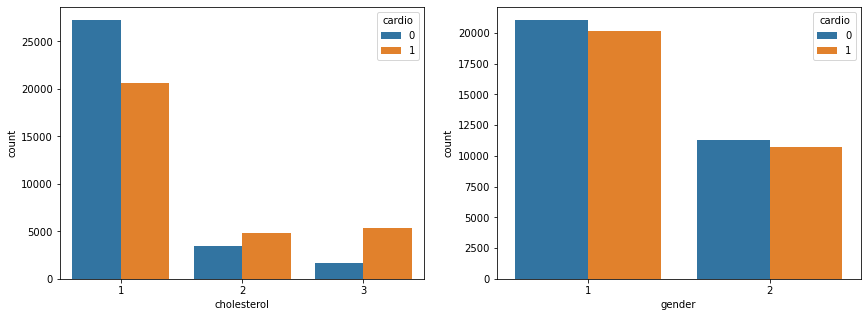

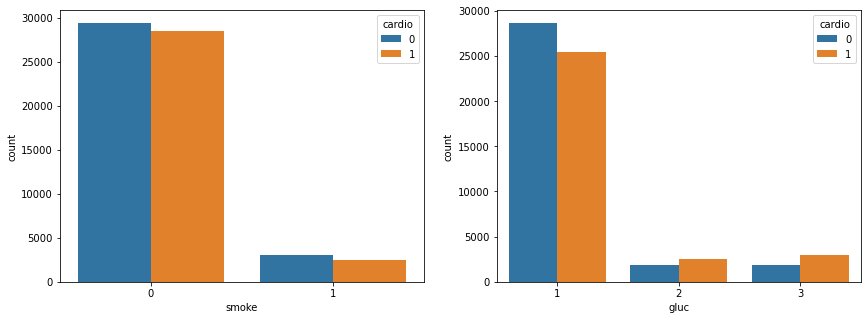

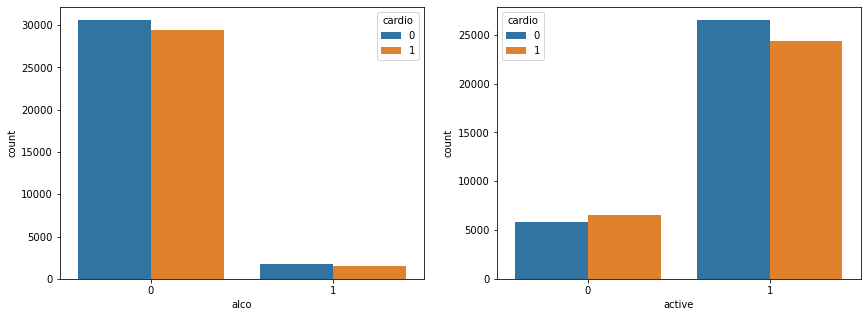

In [18]:
plt.figure(figsize=(30,5))
plt.subplot(1,4,1)
sns.countplot(x='cholesterol', hue='cardio',data=cvd_data)
plt.subplot(1,4,2)
sns.countplot(x='gender',hue='cardio',data=cvd_data)

plt.xticks(rotation=0)
plt.figure(figsize=(30,5))

plt.subplot(1,4,1)
sns.countplot(x='smoke',hue='cardio',data=cvd_data)

plt.subplot(1,4,2)
sns.countplot(x='gluc',hue='cardio',data=cvd_data)

plt.xticks(rotation=0)
plt.figure(figsize=(30,5))

plt.subplot(1,4,1)
sns.countplot(x='alco',hue='cardio',data=cvd_data)

plt.subplot(1,4,2)
sns.countplot(x='active',hue='cardio',data=cvd_data)

#### Data Preparation

In [19]:
cvd_data['gender'].value_counts()

1    41225
2    22096
Name: gender, dtype: int64

In [20]:
cvd_data['cholesterol'].value_counts()

1    47930
2     8294
3     7097
Name: cholesterol, dtype: int64

In [21]:
cvd_data['gluc'].value_counts()

1    54068
3     4779
2     4474
Name: gluc, dtype: int64

In [22]:
cvd_data['smoke'].value_counts()

0    57823
1     5498
Name: smoke, dtype: int64

In [23]:
## Categorical Data : Cholesterol , gluc , 
## Binary Data : Gender , smoke , alc , active
## Continuous Data : age, height, weight, ap_lo, ap_hi
cvd_data.dtypes

age            float64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [24]:
for i in ['gender','cholesterol', 'gluc']:
    cvd_data[i]=cvd_data[i].astype(object)

In [25]:
cvd_data.dtypes

age            float64
gender          object
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol     object
gluc            object
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [26]:
cat_df = cvd_data[['gender','cholesterol', 'gluc']]
cat_df

,gender,cholesterol,gluc
0,2,1,1
1,1,3,1
2,1,3,1
3,2,1,1
4,1,1,1
...,...,...,...
69993,1,1,1
69994,1,1,1
69995,2,1,1
69998,1,1,2


In [27]:
data_dummies = pd.get_dummies(cat_df, drop_first=True)
data_dummies

,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
69993,0,0,0,0,0
69994,0,0,0,0,0
69995,1,0,0,0,0
69998,0,0,0,1,0


In [28]:
cvd_data.drop(list(cat_df.columns),axis=1,inplace=True)

In [29]:
cvd_data=pd.concat([cvd_data,data_dummies],axis=1)
cvd_data

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,50.391781,168,62.0,110,80,0,0,1,0,1,0,0,0,0
1,55.419178,156,85.0,140,90,0,0,1,1,0,0,1,0,0
2,51.663014,165,64.0,130,70,0,0,0,1,0,0,1,0,0
3,48.282192,169,82.0,150,100,0,0,1,1,1,0,0,0,0
4,47.873973,156,56.0,100,60,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53.969863,172,70.0,130,90,0,0,1,1,0,0,0,0,0
69994,57.736986,165,80.0,150,80,0,0,1,1,0,0,0,0,0
69995,52.712329,168,76.0,120,80,1,0,1,0,1,0,0,0,0
69998,61.454795,163,72.0,135,80,0,0,0,1,0,0,0,1,0


In [30]:
## Splitting Data
from sklearn.model_selection import train_test_split
features = cvd_data.drop(['cardio'], axis=1)
target = cvd_data['cardio']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state = 100)


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['age', 'height', 'weight', 'ap_lo', 'ap_hi']] = scaler.fit_transform(X_train[['age', 'height', 'weight', 'ap_lo', 'ap_hi']])

X_train

<ipython-input-31-c99d12d1402a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['age', 'height', 'weight', 'ap_lo', 'ap_hi']] = scaler.fit_transform(X_train[['age', 'height', 'weight', 'ap_lo', 'ap_hi']])
/Users/twinklerinamdar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,age,height,weight,ap_hi,ap_lo,smoke,alco,active,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3
39687,0.917147,1.853443,1.691571,0.304701,-0.126581,0,0,0,1,0,1,1,0
8806,-0.863150,0.065434,0.267871,-1.144829,-1.333681,0,0,0,0,0,0,0,0
24952,-0.189799,0.753130,-1.076735,-0.420064,-1.333681,0,0,0,0,1,0,0,0
24151,1.269468,-0.209645,0.742438,-1.144829,-1.333681,0,0,1,0,0,0,0,0
5278,0.949656,-1.997654,0.505154,1.029465,-0.126581,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13363,0.680641,-0.209645,-1.155830,-0.420064,-0.126581,0,0,0,0,0,0,0,0
63200,-1.673040,-0.897340,-0.760358,-0.420064,-0.126581,0,0,1,0,0,0,0,0
15603,0.154395,1.303286,0.109682,1.754230,1.080518,0,1,1,1,0,0,0,0
61996,0.421378,-1.997654,-0.206696,-0.420064,-0.126581,0,0,0,0,0,0,0,0


In [32]:
X_test[['age', 'height', 'weight', 'ap_lo', 'ap_hi']] = scaler.transform(X_test[['age', 'height', 'weight', 'ap_lo', 'ap_hi']])
X_test

<ipython-input-32-975c90eb1fb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['age', 'height', 'weight', 'ap_lo', 'ap_hi']] = scaler.transform(X_test[['age', 'height', 'weight', 'ap_lo', 'ap_hi']])
/Users/twinklerinamdar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,age,height,weight,ap_hi,ap_lo,smoke,alco,active,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3
60599,-1.493832,2.128521,0.979721,-1.869593,-1.333681,1,0,0,1,0,0,0,0
49163,-0.209304,0.478051,-0.127602,-1.144829,-0.126581,0,0,1,0,0,0,0,0
25274,1.251181,-0.759801,0.742438,-1.869593,-0.126581,0,0,1,0,0,0,0,0
62684,0.698115,0.615590,-1.155830,2.261565,2.166907,0,1,1,1,0,0,0,0
11895,-0.498232,-1.034880,1.296099,-1.144829,-1.333681,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53582,-0.478726,-0.209645,-0.839452,1.754230,2.287617,0,0,1,0,0,1,0,0
3158,-0.415739,0.890669,-0.443980,-0.420064,-0.126581,0,0,1,0,0,0,0,0
59146,0.107256,-0.347184,-0.918547,1.029465,-0.126581,0,0,1,0,1,0,1,0
2497,-0.219057,-0.484723,0.505154,0.304701,-0.126581,0,0,1,0,0,1,0,0


In [33]:
#Calculating BMI
def bmi_calc(w, h):
    return w/(h**2)

In [34]:
cvd_data["bmi"] = cvd_data["weight"]/ (cvd_data["height"]/100)**2
cvd_data

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3,bmi
0,50.391781,168,62.0,110,80,0,0,1,0,1,0,0,0,0,21.967120
1,55.419178,156,85.0,140,90,0,0,1,1,0,0,1,0,0,34.927679
2,51.663014,165,64.0,130,70,0,0,0,1,0,0,1,0,0,23.507805
3,48.282192,169,82.0,150,100,0,0,1,1,1,0,0,0,0,28.710479
4,47.873973,156,56.0,100,60,0,0,0,0,0,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53.969863,172,70.0,130,90,0,0,1,1,0,0,0,0,0,23.661439
69994,57.736986,165,80.0,150,80,0,0,1,1,0,0,0,0,0,29.384757
69995,52.712329,168,76.0,120,80,1,0,1,0,1,0,0,0,0,26.927438
69998,61.454795,163,72.0,135,80,0,0,0,1,0,0,0,1,0,27.099251


#### Tree Based Model - Gradient Boosting

In [79]:
gradient_boost = GradientBoostingClassifier()
#Train the model using the training sets y_pred=clf.predict(X_test)
gradient_boost.fit(X_train,y_train)
y_pred2=gradient_boost.predict(X_test)
print('Gradient Boosting')

gb_accuracy_train = metrics.accuracy_score(y_train, gradient_boost.predict(X_train))*100
gb_accuracy_test = metrics.accuracy_score(y_test, y_pred2)*100
gb_recall = metrics.recall_score(y_test, y_pred2)*100 
gb_precision = metrics.precision_score(y_test, y_pred2)*100

print("Train Accuracy:", metrics.accuracy_score(y_train, gradient_boost.predict(X_train))*100)
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred2)*100)
print("Recall:", metrics.recall_score(y_test, y_pred2)*100)
print("Precision:", metrics.precision_score(y_test, y_pred2)*100)

Gradient Boosting
Train Accuracy: 72.97400956592365
Test Accuracy: 73.55371900826447
Recall: 68.66314768932456
Precision: 75.0854046413005


#### Random Forest Model 

In [76]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier(n_estimators=100, random_state=2020)
random_forest.fit(X_train, y_train)

y_pred3 = random_forest.predict(X_test)

random_forest_train = metrics.accuracy_score(y_train, random_forest.predict(X_train))*100
random_forest_test = metrics.accuracy_score(y_test, y_pred3)*100
random_forest_recall = metrics.recall_score(y_test, y_pred3)*100 
random_forest_precision = metrics.precision_score(y_test, y_pred3)*100

print("Train Accuracy:", metrics.accuracy_score(y_train, random_forest.predict(X_train))*100)
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred3)*100)
print("Recall:", metrics.recall_score(y_test, y_pred3)*100)
print("Precision:", metrics.precision_score(y_test, y_pred3)*100)

Train Accuracy: 99.97067051710134
Test Accuracy: 70.88487655945676
Recall: 69.09404287407088
Precision: 70.66989863375936


#### Logistic Regression Model 

In [77]:

logistic_regression = LogisticRegression()
#Train the model using the training sets y_pred=clf.predict(X_test)
logistic_regression.fit(X_train,y_train)
y_pred4=logistic_regression.predict(X_test)
print('Logistic Regression')

logistic_regression_train = metrics.accuracy_score(y_train, logistic_regression.predict(X_train))*100
logistic_regression_test = metrics.accuracy_score(y_test, y_pred4)*100
logistic_regression_recall = metrics.recall_score(y_test, y_pred4)*100 
logistic_regression_precision = metrics.precision_score(y_test, y_pred4)*100

print("Train Accuracy:", metrics.accuracy_score(y_train, logistic_regression.predict(X_train))*100)
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred4)*100)
print("Recall:", metrics.recall_score(y_test, y_pred4)*100)
print("Precision:", metrics.precision_score(y_test, y_pred4)*100)

Logistic Regression
Train Accuracy: 72.03997834130493
Test Accuracy: 72.80096857398537
Recall: 65.81923946999892
Precision: 75.39486673247778


#### Improving Accuracy by Hyperparameter Tuning

In [48]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std , params in zip(means , stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3), round(std *2,3),params))


In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
gb = GradientBoostingClassifier()
parameters2 = {
    'n_estimators' : [5, 50, 250, 500],
    'max_depth' : [1, 3, 5, 7, 9],
    'learning_rate' : [0.01, 0.1, 1, 10, 100]
}

cv2 = GridSearchCV(gb, parameters2, cv=5)
cv2.fit(X_train, y_train.values.ravel())

print_results(cv2)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}

0.704 (+/-0.011) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.704 (+/-0.011) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.704 (+/-0.011) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.714 (+/-0.011) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.693 (+/-0.013) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.715 (+/-0.012) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.72 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.725 (+/-0.008) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.7 (+/-0.011) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.72 (+/-0.009) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.724 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.725 (+/-0.006) for {'learning_rate'

In [46]:
gb1 = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=250) 
gb1 = gb1.fit(X_train,y_train)

In [47]:
gb1_pred = gb1.predict(X_test)

In [74]:
gb1_Score_tunned_train = metrics.accuracy_score(y_train, gb1.predict(X_train))*100
gb1_Score_tunned_test = metrics.accuracy_score(y_test, gb1_pred)*100 
gb1_Recall_tunned = metrics.recall_score(y_test, gb1_pred)*100 
gb1_Precision_tunned = metrics.precision_score(y_test, gb1_pred)*100

print("Accuracy_train:",metrics.accuracy_score(y_train, gb1.predict(X_train))*100) 
print("Accuracy:",metrics.accuracy_score(y_test, gb1_pred)*100) 
print("Recall:", metrics.recall_score(y_test, gb1_pred)*100) 
print("Precision:", metrics.precision_score(y_test, gb1_pred)*100) 

Accuracy_train: 73.42748849381825
Accuracy: 73.46949518345002
Recall: 68.60928579123127
Precision: 74.97351383166568


In [51]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std , params in zip(means , stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3), round(std *2,3),params))

In [52]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators' : [5, 50, 250],
    'max_depth' : [2, 4, 6, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 250}

0.703 (+/-0.017) for {'max_depth': 2, 'n_estimators': 5}
0.71 (+/-0.014) for {'max_depth': 2, 'n_estimators': 50}
0.712 (+/-0.012) for {'max_depth': 2, 'n_estimators': 250}
0.711 (+/-0.027) for {'max_depth': 4, 'n_estimators': 5}
0.717 (+/-0.009) for {'max_depth': 4, 'n_estimators': 50}
0.717 (+/-0.012) for {'max_depth': 4, 'n_estimators': 250}
0.715 (+/-0.017) for {'max_depth': 6, 'n_estimators': 5}
0.72 (+/-0.012) for {'max_depth': 6, 'n_estimators': 50}
0.72 (+/-0.013) for {'max_depth': 6, 'n_estimators': 250}
0.719 (+/-0.012) for {'max_depth': 8, 'n_estimators': 5}
0.724 (+/-0.015) for {'max_depth': 8, 'n_estimators': 50}
0.724 (+/-0.013) for {'max_depth': 8, 'n_estimators': 250}
0.705 (+/-0.006) for {'max_depth': 16, 'n_estimators': 5}
0.721 (+/-0.006) for {'max_depth': 16, 'n_estimators': 50}
0.722 (+/-0.006) for {'max_depth': 16, 'n_estimators': 250}
0.677 (+/-0.008) for {'max_depth': 32, 'n_estimators': 5}
0.705 (+/-0.007) for

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(max_depth=8, n_estimators=250) 
rf1 = rf1.fit(X_train,y_train)

In [67]:
rf1 = rf1.fit(X_train,y_train)

In [68]:
rf1_pred = rf1.predict(X_test)

In [72]:
rf1_Score_tunned_train = metrics.accuracy_score(y_train, rf1.predict(X_train))*100 
rf1_Score_tunned_test = metrics.accuracy_score(y_test, rf1_pred)*100 
rf1_Recall_tunned = metrics.recall_score(y_test, rf1_pred)*100 
rf1_Precision_tunned = metrics.precision_score(y_test, rf1_pred)*100

print("Accuracy_train:",metrics.accuracy_score(y_train, rf1.predict(X_train))*100) 
print("Accuracy:",metrics.accuracy_score(y_test, rf1_pred)*100) 
print("Recall:", metrics.recall_score(y_test, rf1_pred)*100) 
print("Precision:", metrics.precision_score(y_test, rf1_pred)*100) 

Accuracy_train: 73.31017056222363
Accuracy: 73.29051955571933
Recall: 65.21598621135409
Precision: 76.64261298898595


In [53]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std , params in zip(means , stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3), round(std *2,3),params))


In [54]:
#Logistic Regression by GridSearchCV
lr = LogisticRegression()
parameters4 = {
    'C' : [0.001, 0.01, 0.1, 1, 10]
}

cv4 = GridSearchCV(lr, parameters4, cv=5)
cv4.fit(X_train, y_train.values.ravel())

print_results(cv4)

BEST PARAMS: {'C': 1}

0.717 (+/-0.01) for {'C': 0.001}
0.719 (+/-0.009) for {'C': 0.01}
0.72 (+/-0.011) for {'C': 0.1}
0.72 (+/-0.01) for {'C': 1}
0.72 (+/-0.01) for {'C': 10}


In [63]:
lr1 = LogisticRegression(C=1)
lr1 = lr1.fit(X_train,y_train)

In [64]:
 lr1_pred = lr1.predict(X_test)

In [73]:
lr1_Score_tunned_train = metrics.accuracy_score(y_train, lr1.predict(X_train))*100
lr1_Score_tunned_test= metrics.accuracy_score(y_test, lr1_pred)*100 
lr1_Recall_tunned = metrics.recall_score(y_test, lr1_pred)*100 
lr1_Recall_tunned = metrics.precision_score(y_test, lr1_pred)*100

print("Accuracy_train:",metrics.accuracy_score(y_train, lr1.predict(X_train))*100) 
print("Accuracy:",metrics.accuracy_score(y_test, lr1_pred)*100) 
print("Recall:", metrics.recall_score(y_test, lr1_pred)*100) 
print("Precision:", metrics.precision_score(y_test, lr1_pred)*100)

Accuracy_train: 72.03997834130493
Accuracy: 72.80096857398537
Recall: 65.81923946999892
Precision: 75.39486673247778


In [83]:
models = pd.DataFrame({
    'Model': ['Gradient Boosting', 'Random Forest', 'Logistic Regression'], 
    'Train Accuracy':[gb_accuracy_train , random_forest_train , logistic_regression_train], 
    'Test Score': [gb_accuracy_test , random_forest_test , logistic_regression_test], 
    'Recall':[gb_recall , random_forest_recall , logistic_regression_recall],
    'Precision': [gb_precision , random_forest_precision, logistic_regression_precision],
    'Tunned Train Accuracy':[gb1_Score_tunned_train, rf1_Score_tunned_train, lr1_Score_tunned_train], 
    'Tunned Test Accuracy':[gb1_Score_tunned_test, rf1_Score_tunned_test, lr1_Score_tunned_test], 
    'Tunned Recall':[gb1_Recall_tunned, rf1_Recall_tunned, lr1_Recall_tunned],
    'Tunned Precision': [gb1_Precision_tunned, rf1_Precision_tunned,lr1_Recall_tunned ]
})
models.sort_values(by='Tunned Test Accuracy', ascending=False)

,Model,Train Accuracy,Test Score,Recall,Precision,Tunned Train Accuracy,Tunned Test Accuracy,Tunned Recall,Tunned Precision
0,Gradient Boosting,72.974010,73.553719,68.663148,75.085405,73.427488,73.469495,68.609286,74.973514
1,Random Forest,99.970671,70.884877,69.094043,70.669899,73.310171,73.290520,65.215986,76.642613
2,Logistic Regression,72.039978,72.800969,65.819239,75.394867,72.039978,72.800969,65.819239,65.819239
